<h1>Stock Market Price Prediction Model</h1>

<h2>We start off by reading data.csv into pandas and preparing the data for the linear model.</h2>

In [45]:
import pandas as pd

import numpy as np

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline


In [2]:
df = pd.read_csv('data.csv', parse_dates=True,infer_datetime_format= True).drop('Unnamed: 0', axis = 1)

In [3]:
df.head()

,Date,company,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,...,Gross_profit,Operating_profit,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act
0,2010/02/17,Anglogold Ashanti Ltd,29500.0,-0.103343,30598.216667,1854.530002,850.550000,0.090136,-0.016852,7.08,...,329.5,431.7,317.9,3.9,3.9,732.8,237.2,220.7,454.3,959.6
1,2010/05/06,Anglogold Ashanti Ltd,31150.0,0.139982,28743.150000,1079.933674,697.066667,-0.053612,0.044321,6.58,...,239.3,141.3,115.0,0.3,0.0,741.4,188.0,221.0,396.3,816.6
2,2010/08/11,Anglogold Ashanti Ltd,31420.0,-0.026943,31682.016667,1388.464601,864.983333,0.050286,0.008204,6.42,...,381.9,-8.9,-136.0,2.6,0.0,719.6,203.3,306.8,328.0,1003.0
3,2010/11/10,Anglogold Ashanti Ltd,34987.0,0.096771,32142.716667,784.923382,705.033333,-0.060365,0.136024,5.65,...,400.9,138.2,44.3,559.6,0.0,753.0,248.5,412.7,197.5,1056.6
4,2011/02/16,Anglogold Ashanti Ltd,33230.0,-0.007586,32411.016667,1134.366223,629.016667,-0.061601,0.076571,5.53,...,407.9,197.8,40.4,3.1,3.1,779.3,172.3,444.2,97.4,1095.5


In [4]:
pd.set_option("display.max_columns",30)

In [5]:
df.set_index('Date', inplace = True)

In [6]:
df.head()

,company,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,Revenue,Cost_of_Sales,Gross_profit,Operating_profit,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act
Date,,,,,,,,,,,,,,,,,,,,,
2010/02/17,Anglogold Ashanti Ltd,29500.0,-0.103343,30598.216667,1854.530002,850.550000,0.090136,-0.016852,7.08,951.4,621.9,329.5,431.7,317.9,3.9,3.9,732.8,237.2,220.7,454.3,959.6
2010/05/06,Anglogold Ashanti Ltd,31150.0,0.139982,28743.150000,1079.933674,697.066667,-0.053612,0.044321,6.58,845.3,606.0,239.3,141.3,115.0,0.3,0.0,741.4,188.0,221.0,396.3,816.6
2010/08/11,Anglogold Ashanti Ltd,31420.0,-0.026943,31682.016667,1388.464601,864.983333,0.050286,0.008204,6.42,991.8,609.9,381.9,-8.9,-136.0,2.6,0.0,719.6,203.3,306.8,328.0,1003.0
2010/11/10,Anglogold Ashanti Ltd,34987.0,0.096771,32142.716667,784.923382,705.033333,-0.060365,0.136024,5.65,1066.8,665.9,400.9,138.2,44.3,559.6,0.0,753.0,248.5,412.7,197.5,1056.6
2011/02/16,Anglogold Ashanti Ltd,33230.0,-0.007586,32411.016667,1134.366223,629.016667,-0.061601,0.076571,5.53,1109.5,701.6,407.9,197.8,40.4,3.1,3.1,779.3,172.3,444.2,97.4,1095.5


In [7]:
y = df[['target_return']].values

y = y.reshape((y.shape[0],))
y.shape

(362,)

In [8]:
temp = df.drop('company', axis =1)

X = temp.loc[:, temp.columns != 'target_return'].values

X.shape

(362, 19)

In [9]:
temp.head()

,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,Revenue,Cost_of_Sales,Gross_profit,Operating_profit,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act
Date,,,,,,,,,,,,,,,,,,,,
2010/02/17,29500.0,-0.103343,30598.216667,1854.530002,850.550000,0.090136,-0.016852,7.08,951.4,621.9,329.5,431.7,317.9,3.9,3.9,732.8,237.2,220.7,454.3,959.6
2010/05/06,31150.0,0.139982,28743.150000,1079.933674,697.066667,-0.053612,0.044321,6.58,845.3,606.0,239.3,141.3,115.0,0.3,0.0,741.4,188.0,221.0,396.3,816.6
2010/08/11,31420.0,-0.026943,31682.016667,1388.464601,864.983333,0.050286,0.008204,6.42,991.8,609.9,381.9,-8.9,-136.0,2.6,0.0,719.6,203.3,306.8,328.0,1003.0
2010/11/10,34987.0,0.096771,32142.716667,784.923382,705.033333,-0.060365,0.136024,5.65,1066.8,665.9,400.9,138.2,44.3,559.6,0.0,753.0,248.5,412.7,197.5,1056.6
2011/02/16,33230.0,-0.007586,32411.016667,1134.366223,629.016667,-0.061601,0.076571,5.53,1109.5,701.6,407.9,197.8,40.4,3.1,3.1,779.3,172.3,444.2,97.4,1095.5


In [10]:
df.columns

Index(['company', 'current_price', 'momentum', 'moving_average',
       'moving_volatility', 'trading_range', 'target_return',
       'exp_market_change', 'rates', 'Revenue', 'Cost_of_Sales',
       'Gross_profit', 'Operating_profit', 'Net_Profit', 'Issue_of_shares',
       'Share_repurchase', 'Non_current_assets', 'Current_assets',
       'Non_current_liabilities', 'Current_liabilities', 'net_cash_op_act'],
      dtype='object')

In [11]:
np.set_printoptions(threshold=np.nan)

X[0, :]

array([ 2.95000000e+04, -1.03343465e-01,  3.05982167e+04,  1.85453000e+03,
        8.50550000e+02, -1.68519039e-02,  7.08000000e+00,  9.51400000e+02,
        6.21900000e+02,  3.29500000e+02,  4.31700000e+02,  3.17900000e+02,
        3.90000000e+00,  3.90000000e+00,  7.32800000e+02,  2.37200000e+02,
        2.20700000e+02,  4.54300000e+02,  9.59600000e+02])

In [12]:
X.shape

(362, 19)

In [13]:
y[0:5]

array([ 0.09013559, -0.05361156,  0.05028644, -0.06036528, -0.06160096])

<h3>Our scoring function for our model</h3>

In [14]:
# Let's define a function that calculates a cross-validated MSE as suggested
# by http://scott.fortmann-roe.com/docs/MeasuringError.html
# Pros and cons of our approach are listed in the provided link but it does have the advantage of requiring less assumptions
# and it has a conservative bias which means the actual mse is probably even smaller.

def get_MSE(model, X, y, cv = 10, toggle_return = False):
    
    """Returns the cross-validated mse(median and mean) as well as the sd in a dictionary
        if toggle_return is true, otherwise it returns the median mse. This was done so the
        function could act as a sklearn scorer function/callable object.
    """
    
    from sklearn.model_selection import cross_val_score
    
    scores = float(-1)*cross_val_score(model, X, y, cv = cv, scoring = 'neg_mean_squared_error')
    #print(scores)
    
    re = {'median':np.median(scores), 'sd': scores.std(), 'mean':scores.mean()}
    if toggle_return:
        return re
    else:
        return -1*re['median']


<h1>Part I: Feature Selection</h1>

<h2>Method I : backward elimination with p-values</h2>

In [15]:
def backwardElimination(x, sl):
    x = np.append(arr = x, values = np.ones((x.shape[0], 1)).astype(int), axis = 1)
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

In [16]:
SL = 0.05
X_Modelled1 = backwardElimination(X, SL)[:,:-1]

In [17]:
X_Modelled1[0]

array([ 2.95000000e+04,  1.85453000e+03, -1.68519039e-02,  7.08000000e+00])

<h2>Method II: Recursive feature elimination with cross-validation</h2>

In [18]:
from sklearn.feature_selection import RFECV

# also have to instantiate LinearRegression so we can use the resulting coefficients to get rid of features

from sklearn.linear_model import LinearRegression

estimator = LinearRegression()

In [19]:
selector = RFECV(estimator, step=1, cv=5, scoring = get_MSE)

selector.fit(X, y)

X_Modelled2 = selector.transform(X)

In [20]:
X_Modelled2[0]

array([-0.10334347, -0.0168519 ,  7.08      ])

In [21]:
X_Modelled2.shape

(362, 3)

<h2>Train models on both sets of data</h2>

<h3>Train and test the model on the data that has all the features as a control.</h3>

In [22]:
linreg = LinearRegression()

In [23]:
# We use the median MSE after cross_validation because it is less susceptible to outliers, which can skew the MSE we get from the data

print('MSE for all the features')
print('Linear Regression mse: {}'.format(get_MSE(linreg, X, y, cv = 10, toggle_return = True)['median']))

MSE for all the features
Linear Regression mse: 0.01759881892569637


<h3>Now the model that has features chosen through backward elimination only using p-values</h3>

In [24]:
print('MSE for the features chosen using backward elimination')
print('Linear Regression mse: {}'.format(get_MSE(linreg, X_Modelled1, y, cv = 10, toggle_return = True)['median']))

MSE for the features chosen using backward elimination
Linear Regression mse: 0.0169346843135594


<h3>And finally we calculate the same for the model utilising features chosen through RFECV</h3>

In [25]:
print('MSE for the features chosen using backward elimination')
print('Linear Regression mse: {}'.format(get_MSE(linreg, X_Modelled2, y, cv = 10, toggle_return = True)['median']))

MSE for the features chosen using backward elimination
Linear Regression mse: 0.01517844672589121


<h2>We can conclude that X_Modelled2 has the best combination of features</h2>

<h3>The relevant variables from X_Modelled2</h3>
<ol>
    <li>momentum</li>
    <li>exp_market_change</li>
    <li>rates</li>
</ol>

<h1>Part II: Regularisation</h1>

<h2>Regularization: Deciding between no regularization, Lasso and Ridge regularization</h2>

<h3>
    Our approach is similar to the one we've taken above, we first scale the features and calculate the cross-validated MSE
    for each of the LinearRegression, LassoCV , RidgeCV and ElasticNetCV models(we've chosen the regularised models that implement
    cross-validation in choosing the regularisation parameter alpha)
</h3>

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Avoid scaling one-hot-encoded variables
X_scaled = scaler.fit_transform(X_Modelled2)

In [27]:
X_scaled[0]

array([-1.19175162, -0.75248708,  1.61437711])

<h4>The linear regression model will act as our control in this case.</h4>

In [28]:
linear = LinearRegression()

print('Linear Regression mse: {}'.format(get_MSE(linear, X_scaled, y, cv = 10, toggle_return = True)['median']))

Linear Regression mse: 0.015178446725891222


<h4>Now we will test LassoCV</h4>

In [29]:
a = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

from sklearn.linear_model import LassoCV

In [30]:
lasso = LassoCV(cv = 10)

print('Lasso Regression mse: {}'.format(get_MSE(lasso, X_scaled, y, cv = 10, toggle_return = True)['median']))

Lasso Regression mse: 0.015171275338667634


<h4>Testing RidgeCV</h4>

In [33]:
from sklearn.linear_model import RidgeCV

In [34]:
ridge = RidgeCV(alphas=(0.001, 0.01, 0.1, 1, 10, 25, 50, 75, 100), cv = 10, scoring = 'neg_mean_squared_error')

print('Ridge Regression mse: {}'.format(get_MSE(ridge, X_scaled, y, cv = 10, toggle_return = True)['median']))

Lasso Regression mse: 0.015068658791550536


<h4>Testing ElasticNetCV</h4>

In [36]:
from sklearn.linear_model import ElasticNetCV

elastic = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.7,0.9, 0.95, 0.99, 1.0], cv = 10)

print('Elastic Net Regression mse: {}'.format(get_MSE(elastic, X_scaled, y, cv = 10, toggle_return = True)['median']))

Lasso Regression mse: 0.015153934885223501


In [38]:
elastic.fit(X_scaled, y)

print('l1-ratio(closer to 1 is l1 penalization as in lasso and closer to zero is l2 as in ridge): {}'.format(elastic.l1_ratio_))

l1-ratio(closer to 1 is l1 penalization as in lasso and closer to zero is l2 as in ridge): 0.1


<h2>We conclude that ridge regularisation performs best according to our scoring method implemented in the get_MSE function.</h2>

<h3>Interestingly, ElasticNet is supposed to offer a balance between Ridge and Lasso regularization, and based on the l1_ratio the cross-validated model chose(it selected the closest possible value to 0), it seems to prefer ridge regularisation for our particular data.</h3>

<h1>Part III: Building the final model</h1>

In [39]:
# instantiate RidgeCV with a wider range of alphas
model = RidgeCV(alphas = (0.001, 0.01, 0.1, 1, 10, 25, 50, 75, 100), cv = 10, scoring = 'neg_mean_squared_error')

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 839302)

In [41]:
# training the model
model.fit(X_train, y_train)

RidgeCV(alphas=(0.001, 0.01, 0.1, 1, 10, 25, 50, 75, 100), cv=10,
    fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [387]:
# model coefficients

model.coef_

array([-0.00052618, -0.01986197, -0.01542252])

<h4>It seems as if RidgeCV has attached higher importance to exp_market_change and rates as opposed to momentum(by a factor of ~100)</h4>

<p>This means that a change of 1 in the exp_market_change and rates scaled variables respectively, leads to a change in the target_return that is ~200 times bigger than the change that occurs if the scaled momentum changes by 1</p>

In [42]:
# model intercept

model.intercept_

0.02901889177589184

<h4>When all three variables are equal to their mean values, the expected stock return(according to our model) is 0.029</h4>

In [43]:
# model regularization parameter

model.alpha_

75

<h4>Scatter plot of actual returns vs. the model predictions on the test set</h4>

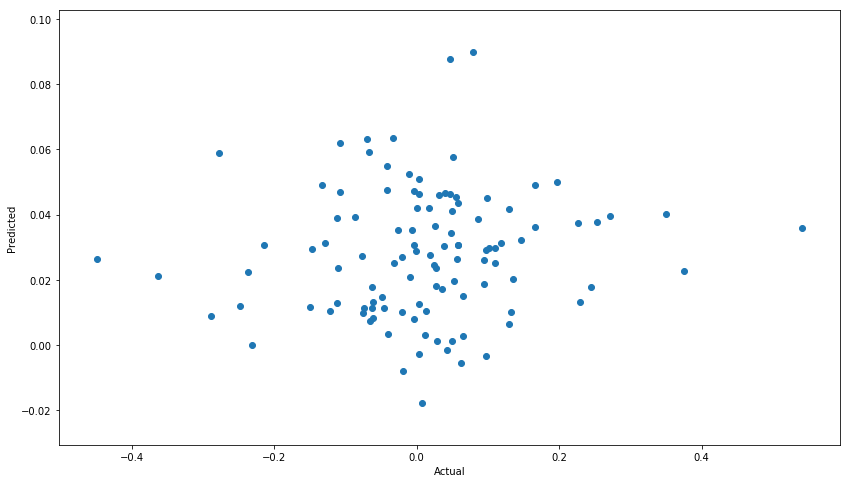

In [97]:
a = plt.figure(figsize = (14,8))

plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')

a.savefig('actual_vs_pre.png')

In [54]:
# Test model perfomance of model on test set using MSE

from sklearn.metrics import mean_squared_error

print('Train set')
pred1 = model.predict(X_train)
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred1)))
print('Test set')
pred2 = model.predict(X_test)
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred2)))

Train set
Linear Regression mse: 0.013725799932900268
Test set
Linear Regression mse: 0.019605850939107765


In [55]:
# Test Model perfomance using our cross-validated MSE

print('Train set')
pred1 = model.predict(X_train)
print('Linear Regression mse: {}'.format(-1.0*get_MSE(model, X_train, y_train)))
print('Test set')
pred2 = model.predict(X_test)
print('Linear Regression mse: {}'.format(-1.0*get_MSE(model, X_test, y_test)))

Train set
Linear Regression mse: 0.011544385410485643
Test set
Linear Regression mse: 0.016440842886485663


In [59]:
model.score(X_scaled, y)

0.03614023788741905

<h1>Part IV: Conclusion</h1>

<p>
    We have found the best performing model to be linear regression with ridge regularization.
    We chose the regularization parameter using cross validation.
</p>

<p>
    The variables were chosen using recursive feature elimination based on the model coefficients.
    The optimal number of variables was also chosen using cross-validation.
</p>

<p>
    Even though we are confident in the model as the best one we could find, it still only explains ~3.6% of the variance in y
</p>
<p>
    In terms of improving this model, it might be worth re-examining the linear regression assumptions we have made, namely:
    <ul>
        <li>The true relationship between our predictor variables and y is linear.</li>
        <li>The model errors are statistically independent of each other</li>
        <li>Homoscedasticity(constant variance) of the errors</li>
        <li>Errors are normally distributed around zero.</li>
    </ul>
</p>
<p>
    We conclude by plotting 2 error plots which will help reveal if:
    <ol>
        <li>
            Model errors are independent of each other(as well as homoscedasticity) using a line plot of residuals vs time.
            <ol>
                <li>We plot a further autocorrelation graph to check this condition.</li>
            </ol>
        </li>
        <li>Model errors are normally distributed with zero mean and constant sd.</li>
    </ol>
</p>



<h1>Addendum: Examining assumptions about the error distribution.</h1>

In [60]:
# create the array of residuals
res = model.predict(X_scaled) - y 

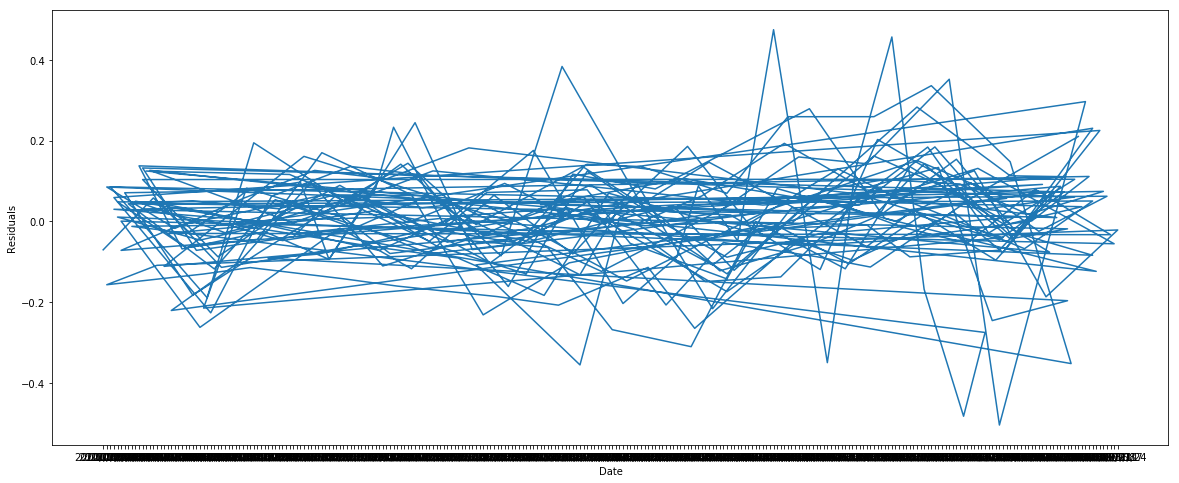

In [98]:
# plot residuals over time

a = plt.figure(figsize = (20,8))

plt.plot(df.index.values, res)
plt.xlabel('Date')
plt.ylabel('Residuals')

a.savefig('residuals_vs_time.png')

<h4>The residuals do not look like they are independent, let us look at the auto-correlations</h4>

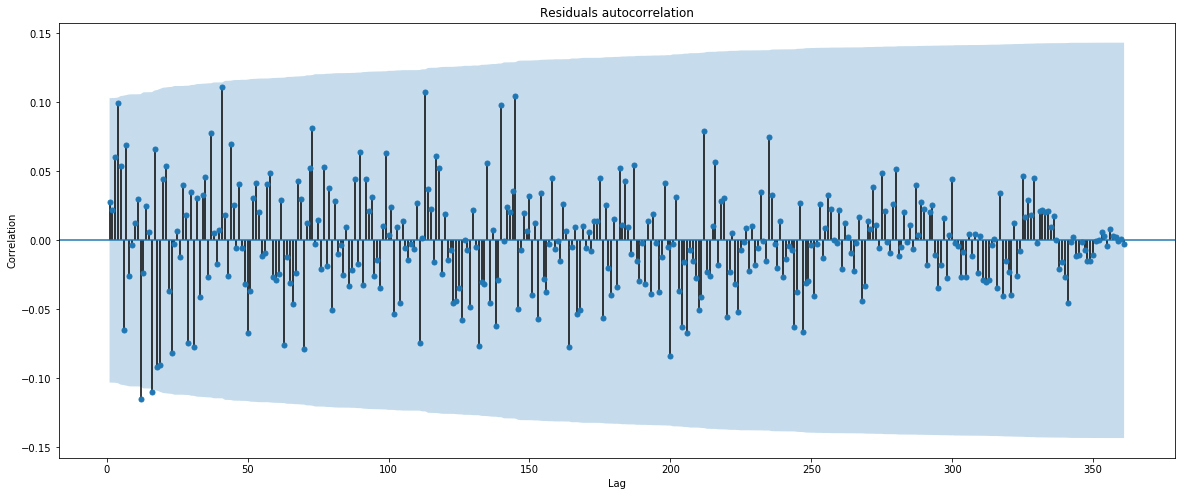

In [100]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(20, 8))

plot_acf(res, zero = False, title = 'Residuals autocorrelation', ax = ax)

plt.xlabel('Lag')
plt.ylabel('Correlation')

fig.savefig('residuals_auto_corr.png')

plt.show()

<h4>For two time lags near zero, we have a negative statistically significant correlation around -0.10(the light-blue cone covers the 95% confidence interval)</h4>

<h4>Let's see how the residuals are distributed using seaborn</h4>

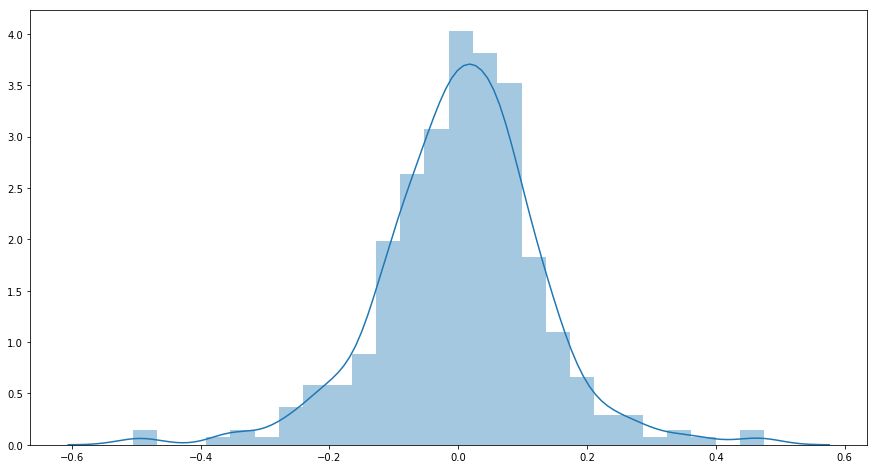

In [101]:
a = plt.figure(figsize = (15,8))

sns.distplot(res, kde = True, bins = None)


a.savefig('residuals_histogram.png')

<h4>We need a few more plots to test if homoscedasticity holds</h4>

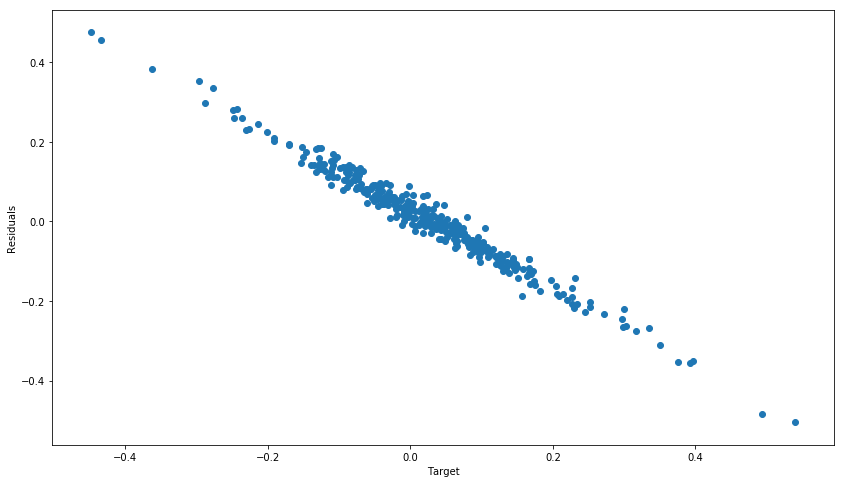

In [102]:
a = plt.figure(figsize = (14,8))

plt.scatter(y, res)
plt.ylabel('Residuals')
plt.xlabel('Target')


a.savefig('residuals_vs_target.png')

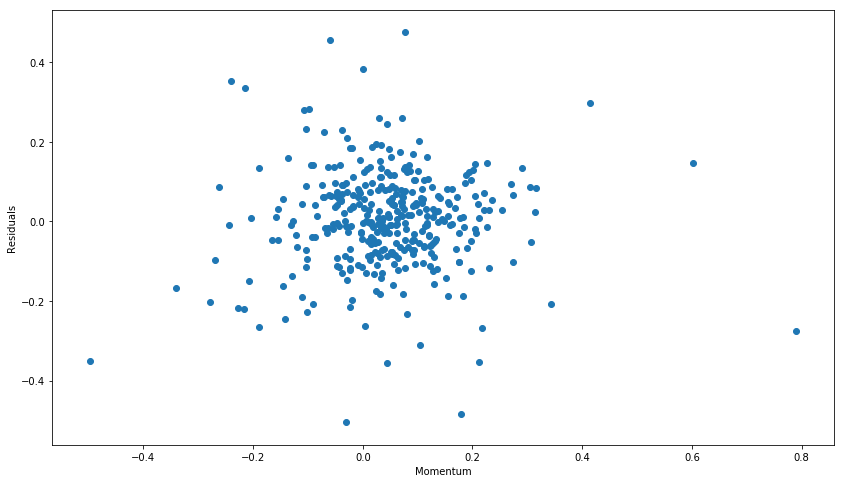

In [103]:
a = plt.figure(figsize = (14,8))

plt.scatter(df['momentum'].values, res)
plt.ylabel('Residuals')
plt.xlabel('Momentum')


a.savefig('residuals_vs_momentum.png')

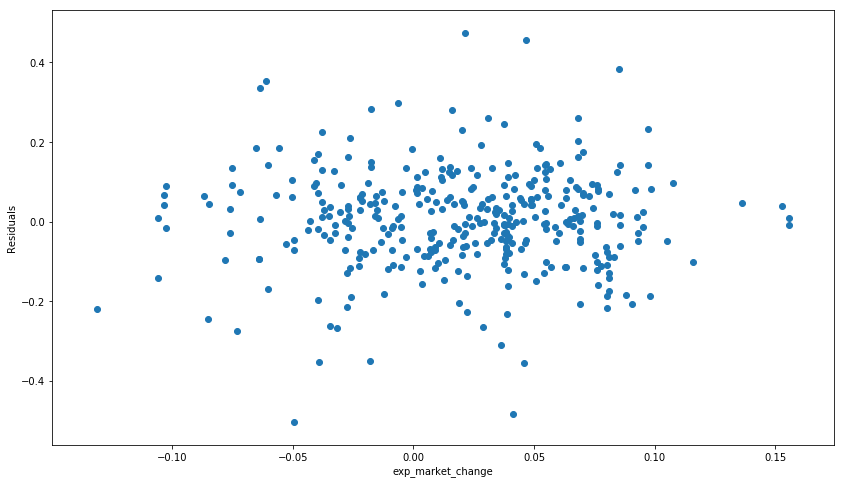

In [104]:
a = plt.figure(figsize = (14,8))

plt.scatter(df['exp_market_change'].values, res)
plt.ylabel('Residuals')
plt.xlabel('exp_market_change')


a.savefig('residuals_vs_futures.png')

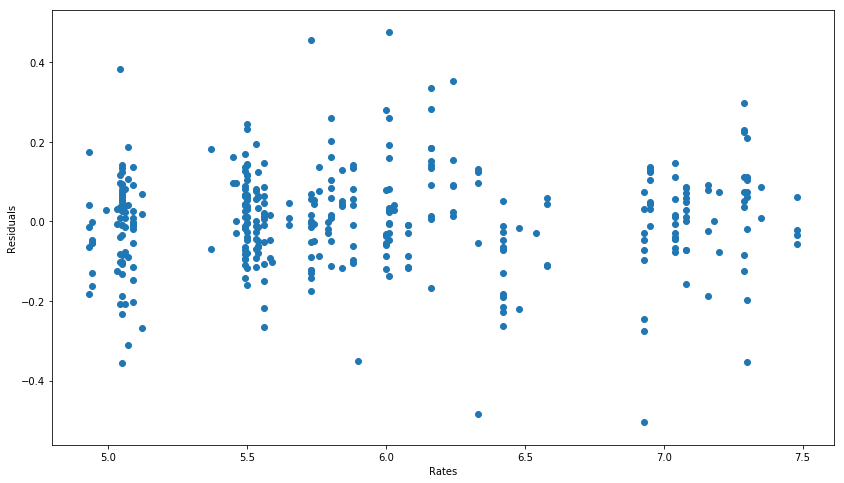

In [105]:
a = plt.figure(figsize = (14,8))

plt.scatter(df['rates'].values, res)
plt.ylabel('Residuals')
plt.xlabel('Rates')


a.savefig('residuals_vs_rates.png')

<h3>Error Assumptions Conclusions:</h3>

<ul>
    <li>The errors are relatively independent, only two time lags produce a small statistically significant autocorrelation at the 5% significance level.</li>
    <li>The variance seems to increase with time(from the first plot) and we can see clearly from the residuals vs target plot that the homoscedasticity assumption does not hold. This is expected for stock market data(http://people.duke.edu/~rnau/testing.htm#independence) and a possible fix might require either shortening the timespan for our analysis or changing the model to a more appropriate one for this type of analysis.</li>
    <li>The error distribution is normally distributed.</li>
</ul>

<p>So two out of three of the linear regression assumptions around the errors hold, only homoscedasticity fails.</p>

<p>Testing the linearity of the relationship between the X(independent) variables and the target is the logical next step but we have chosen to limit ourselves to linear regression.</p>